In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Gaurav/Downloads/UPGRAD/loan.csv")

C:\Users\Gaurav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.isna().any()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\Gaurav\AppData\Local\Temp/ipykernel_8928/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [7]:
not_required_columns = ["id","member_id","url","zip_code","pymnt_plan","initial_list_status","collections_12_mths_ex_med",
                       "policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt", "tax_liens",
                       "earliest_cr_line", "out_prncp", "out_prncp_inv", "last_credit_pull_d", "recoveries"]
df.drop(labels = not_required_columns, axis =1, inplace=True)

In [8]:
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [9]:
null_col_50 = null_values(df)[null_values(df)>50]
null_col_50.index

Index(['open_il_12m', 'mths_since_recent_bc_dlq', 'mort_acc', 'mo_sin_rcnt_tl',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct',
       'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths',
       'inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util',
       'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'open_il_24m',
       'mths_since_recent_revol_delinq', 'total_bc_limit', 'total_bal_ex_mort',
       'tot_hi_cred_lim', 'percent_bc_gt_75', 'pct_tl_nvr_dlq',
       'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd',
       'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0', 'num_rev_accts',
       'num_op_rev_tl', 'num_il_tl', 'num_bc_tl', 'num_bc_sats',
       'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd',
       'mths_since_rcnt_il', 'total_il_high_credit_limit',
       'mths_since_last_major_derog', 'open_acc_6m', 't

In [10]:
df.drop(columns = null_col_50.index, inplace = True)

In [11]:
df.shape

(39717, 36)

In [12]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [13]:
df['term'] = df['term'].str.strip()
df['term'] = df['term'].str.split().str[0].astype(int)

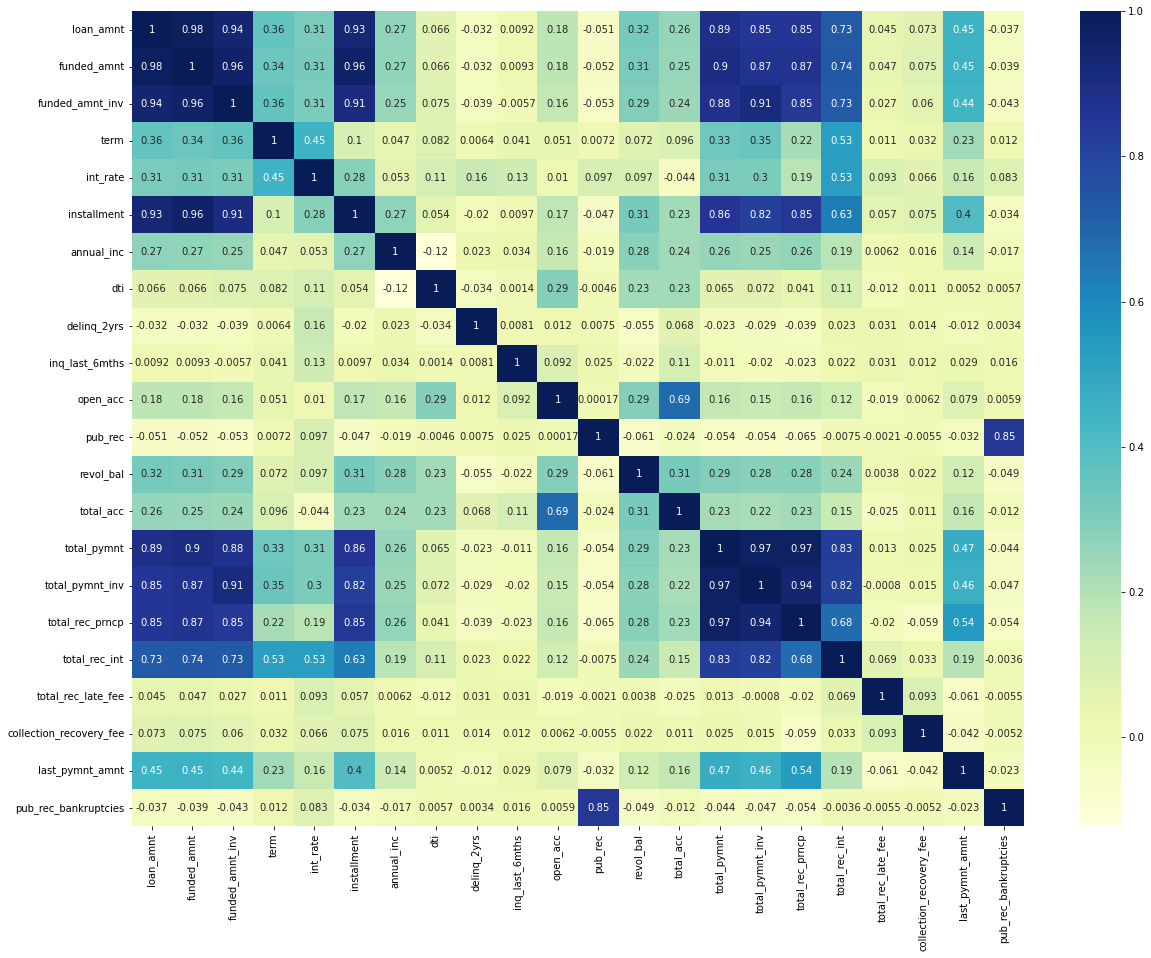

In [14]:
plt.figure(figsize = (20,15))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()

Text(0, 0.5, 'Frequency')

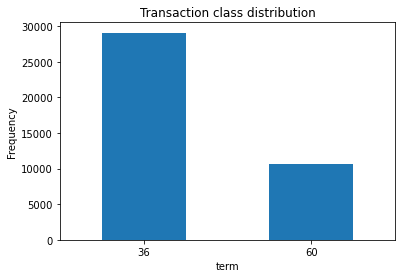

In [15]:
count_classes = pd.value_counts(df['term'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xlabel("term")
plt.ylabel("Frequency")

In [16]:
(df.loan_status.value_counts()*100)/len(df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [17]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

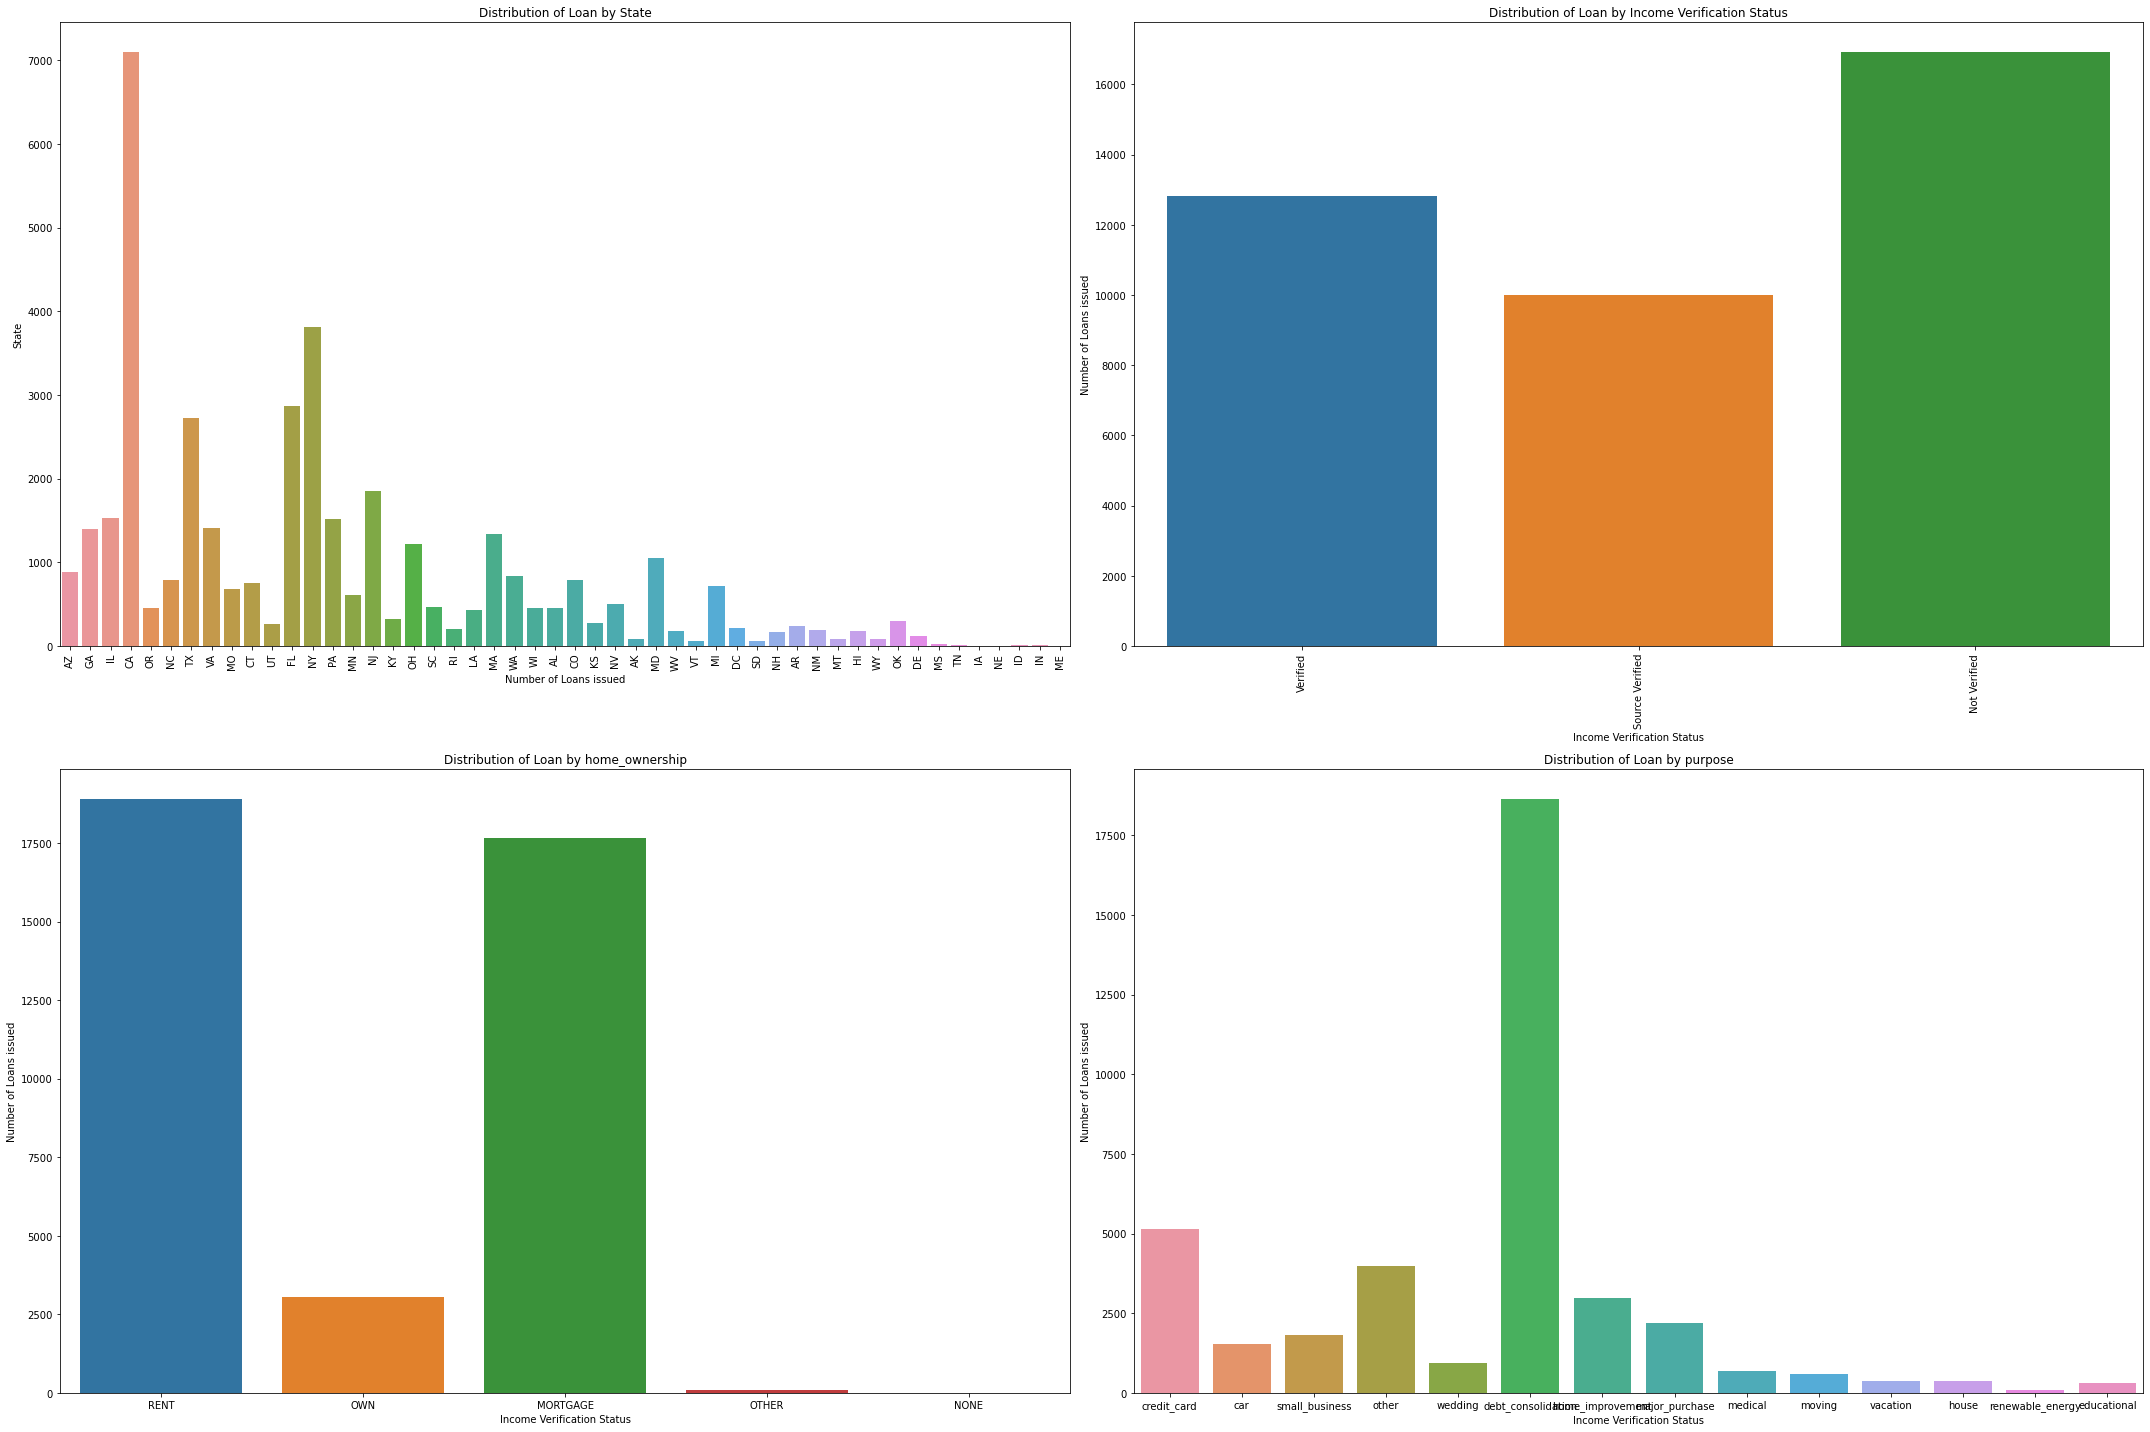

In [18]:
plt.figure(figsize=(30,20))

plt.figure(1)

# Distribution of Loan by State
plt.subplot(2,2,1)
sns.countplot(x='addr_state', data=df)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")



# Distribution of Loan by Income Verification Status
plt.subplot(2,2,2)
sns.countplot(x='verification_status', data=df)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")


# To rotate axis text
plt.xticks(rotation=90)


plt.subplot(2,2,3)
sns.countplot(x='home_ownership', data=df)
plt.title('Distribution of Loan by home_ownership')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")




plt.subplot(2,2,4)
sns.countplot(x='purpose', data=df)
plt.title('Distribution of Loan by purpose')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")


# To adjust spacing between subplots
plt.tight_layout()

plt.show()

C:\Users\Gaurav\AppData\Local\Temp/ipykernel_8928/861477384.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str


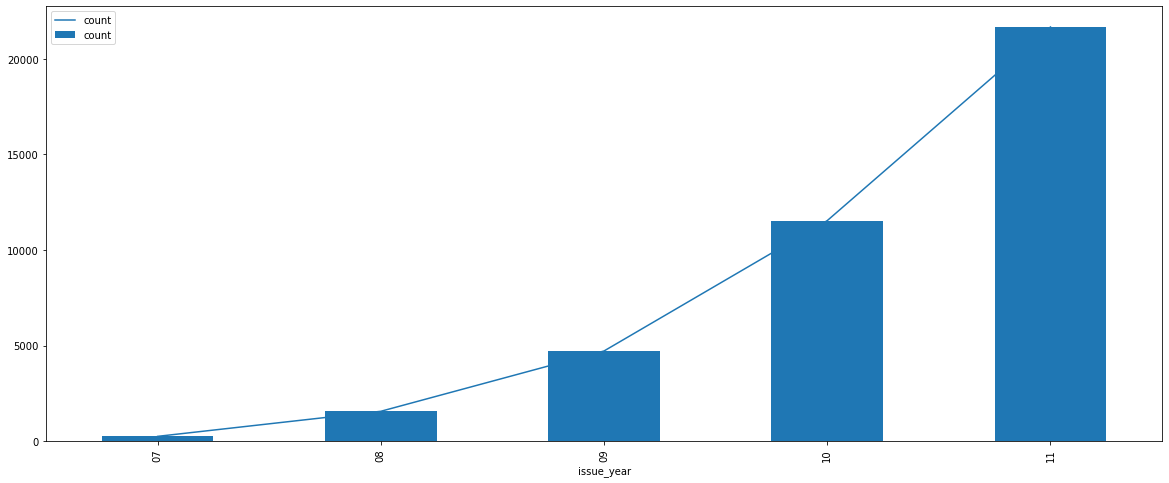

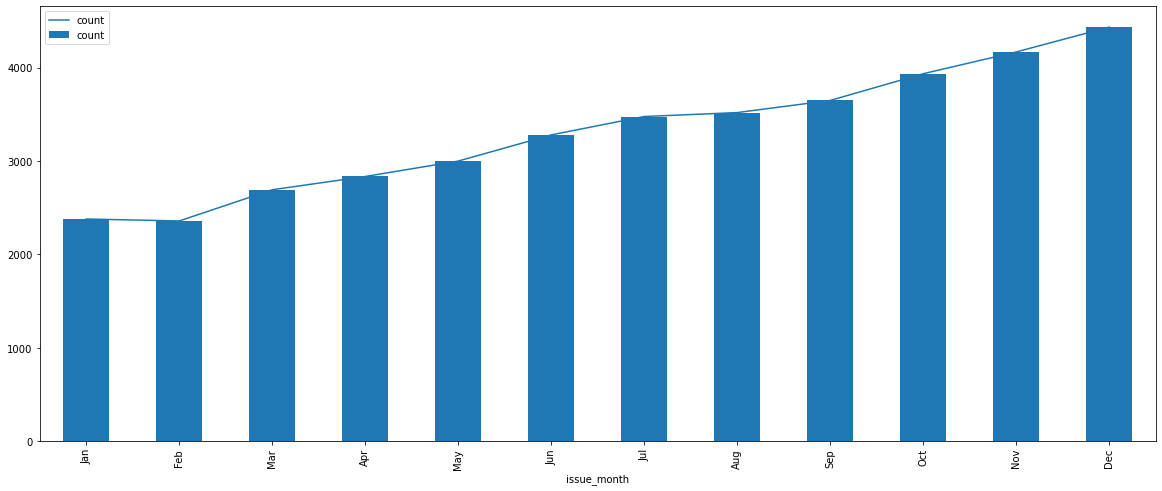

In [19]:
df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str

year_wise =df.groupby(by= [df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

year_wise =df.groupby(by= [df.issue_month])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

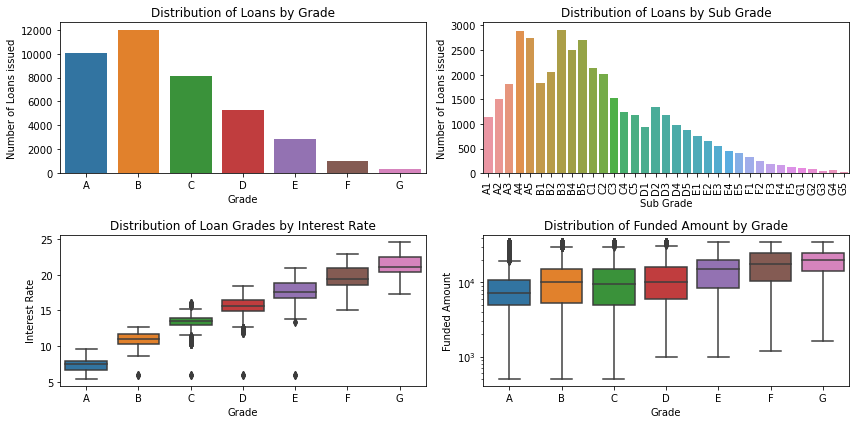

In [20]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=df,order = np.sort(df['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=df, order = np.sort(df['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=df, order = np.sort(df['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt" , data=df, order = np.sort(df['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


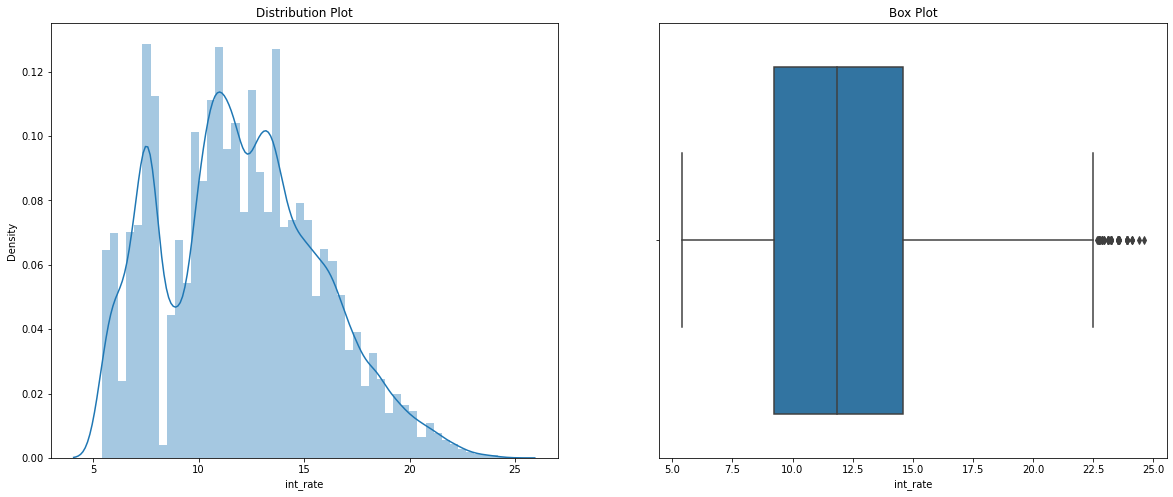

In [21]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(df['int_rate'],ax = ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = df, x = 'int_rate', ax = ax[1], orient = 'v')

plt.show()

In [22]:
print(df.emp_length.unique())
df.emp_length.fillna('0',inplace=True)
df.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [23]:
print(df.emp_title.unique())
df.emp_title.replace('0','Self-Employed',inplace=True)
df.emp_title.fillna('Self-Employed',inplace=True)
print(df.emp_title.unique())

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
['Self-Employed' 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


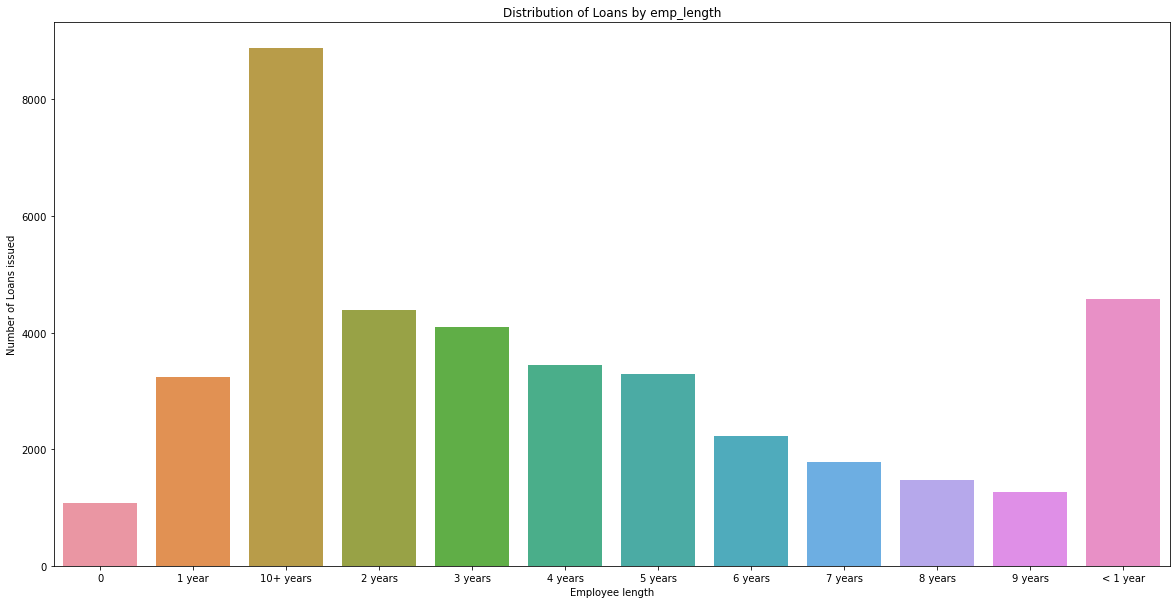

In [24]:
# Distribution of Loans by Employee Length
plt.figure(figsize=(20,10))

sns.countplot( x="emp_length", data=df,order = np.sort(df['emp_length'].unique()))
plt.title("Distribution of Loans by emp_length")
plt.xlabel("Employee length")
plt.ylabel("Number of Loans issued")

plt.show()

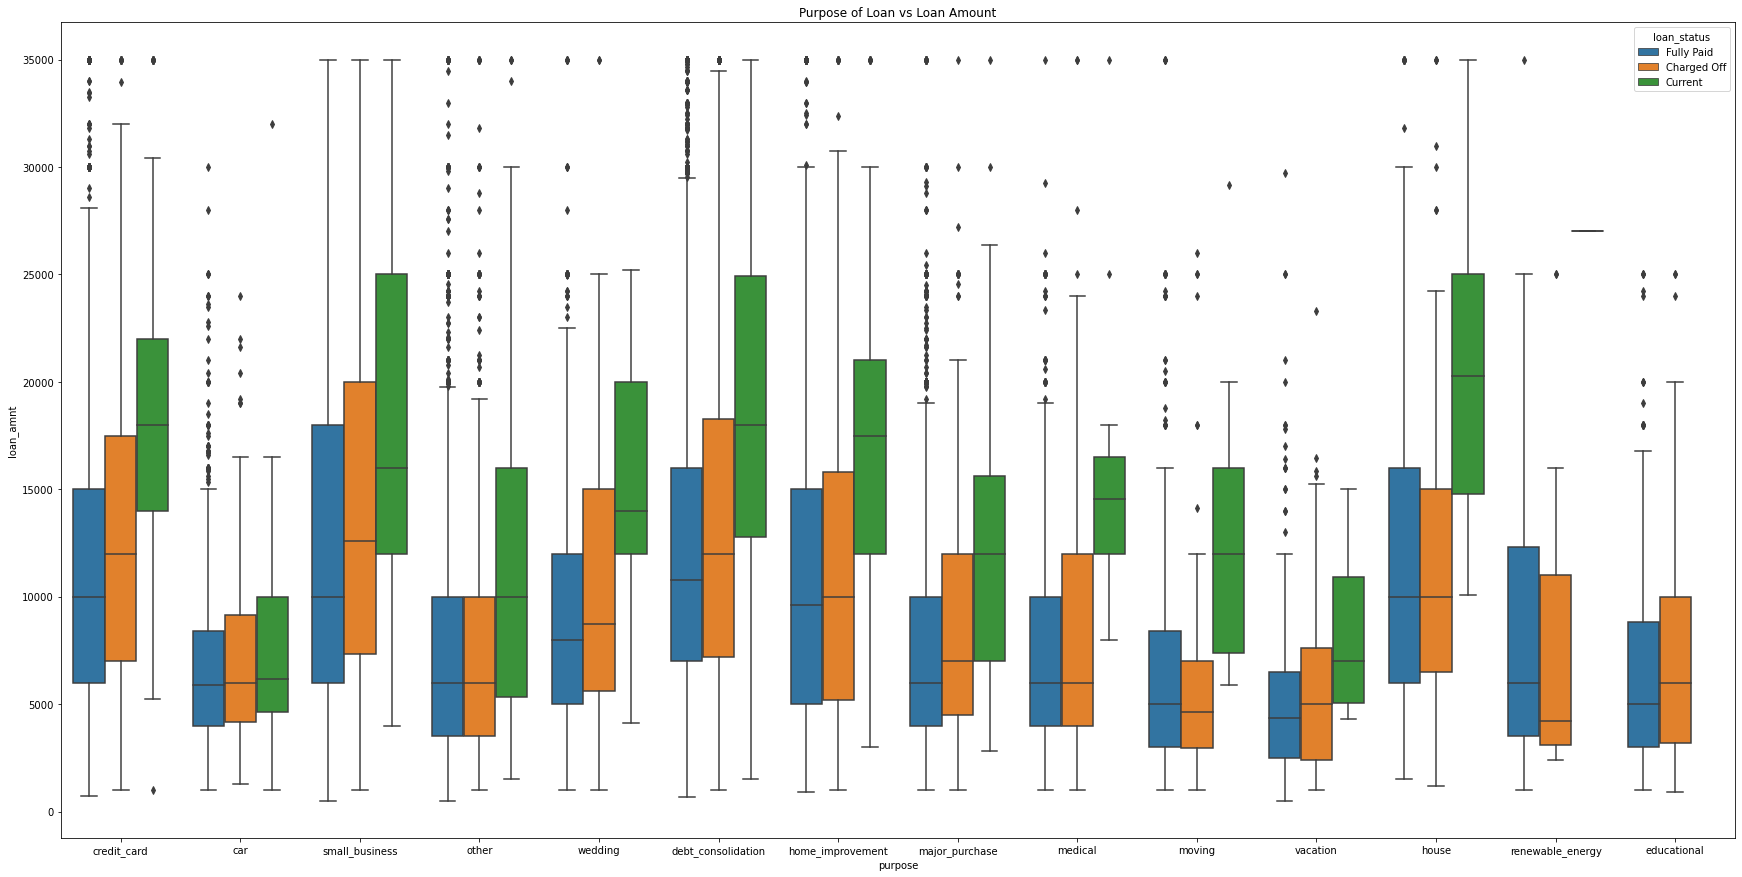

In [25]:
plt.figure(figsize=(30,15))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

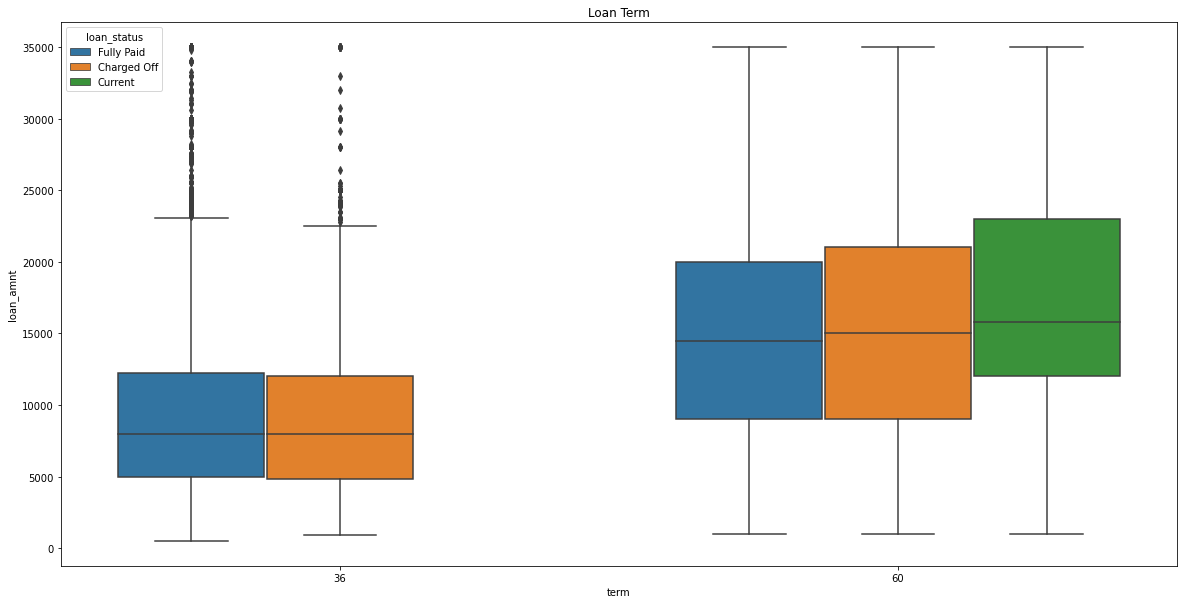

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data =df, x='term', y='loan_amnt', hue ='loan_status')
plt.title('Loan Term')
plt.show()


In [27]:
charge_off = df.loc[df['loan_status'] == 'Charged Off']
charge_off.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.0,1.1100,2013-04-01,119.66,0.0,Dec,11
8,5600,5600,5600.0,60,21.28,152.39,F,F2,Self-Employed,4 years,...,646.02,162.02,294.94,0.0,2.0900,2012-04-01,152.39,0.0,Dec,11
9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,< 1 year,...,1469.34,673.48,533.42,0.0,2.5200,2012-11-01,121.45,0.0,Dec,11
12,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,2270.70,1256.14,570.26,0.0,4.1600,2012-07-01,305.38,0.0,Dec,11
14,10000,10000,10000.0,36,10.65,325.74,B,B2,SFMTA,3 years,...,7471.99,5433.47,1393.42,0.0,6.3145,2013-10-01,325.74,0.0,Dec,11


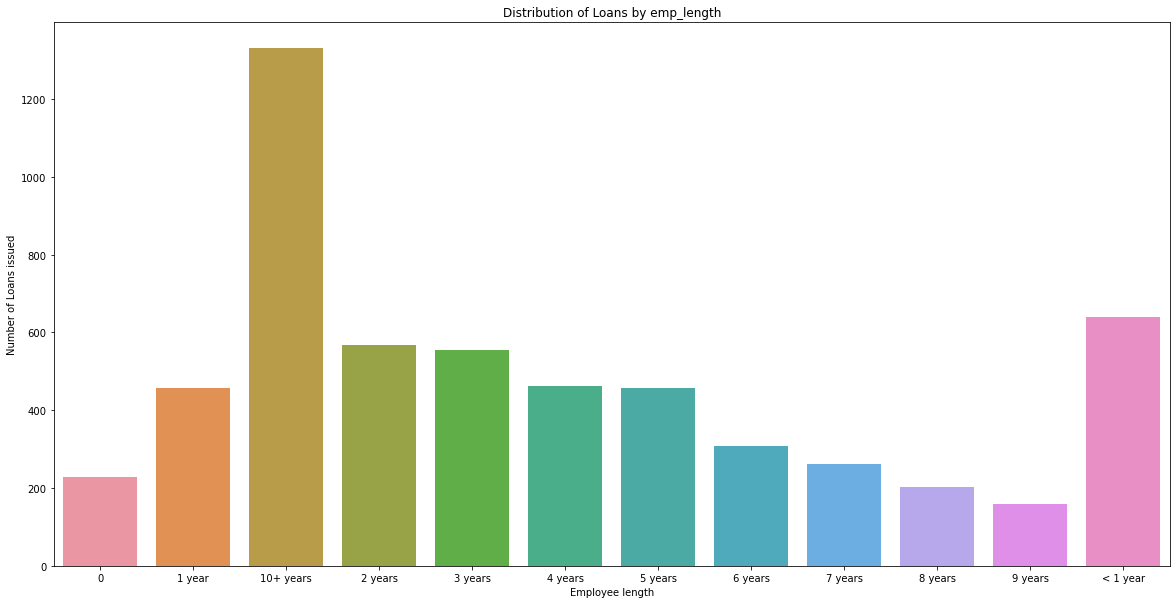

In [28]:
plt.figure(figsize=(20,10))

sns.countplot( x="emp_length", data=charge_off,order = np.sort(charge_off['emp_length'].unique()))
plt.title("Distribution of Loans by emp_length")
plt.xlabel("Employee length")
plt.ylabel("Number of Loans issued")

plt.show()

In [29]:
employee_length = df.loc[(df['emp_length'] == '10+ years') & (df['loan_status'] == 'Charged Off')]
employee_length.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year
21,21000,21000,21000.00000,36,12.42,701.73,B,B4,Osram Sylvania,10+ years,...,14025.40,10694.96,3330.44,0.00,0.0000,2013-09-01,701.73,0.0,Dec,11
46,5000,5000,5000.00000,36,8.90,158.77,A,A5,STERIS Corporation,10+ years,...,5021.37,4217.38,696.99,0.00,1.0700,2014-08-01,158.77,0.0,Dec,11
64,10000,10000,9975.00000,60,10.65,215.69,B,B2,CEC ENTERTAINMENT INC,10+ years,...,8751.08,5495.38,2429.23,1.00,152.5140,2015-04-01,1.00,0.0,Dec,11
105,18825,18825,18800.00000,60,16.77,465.53,D,D2,Texas Health & Human Services Commission,10+ years,...,18724.53,8087.75,6786.71,0.00,670.8193,2014-09-01,465.53,0.0,Dec,11
120,25000,25000,23088.16106,60,13.49,575.12,C,C1,Midnight,10+ years,...,20309.60,13833.20,8008.11,28.76,361.9044,2015-03-01,1179.00,0.0,Dec,11


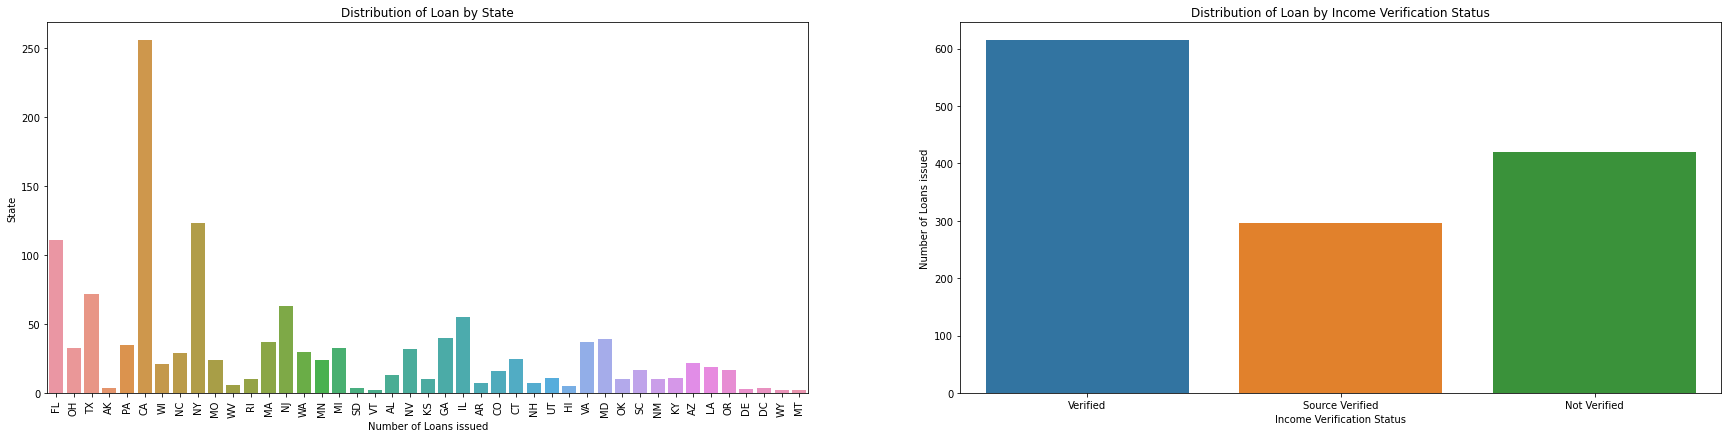

In [30]:
plt.figure(figsize=(30,15))

plt.figure(1)

plt.subplot(2,2,1)

# Distribution of Loan by State
sns.countplot(x='addr_state', data = employee_length)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")

# Distribution of Loan by Income Verification Status
plt.subplot(2,2,2)
sns.countplot(x='verification_status', data = employee_length)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")


plt.show()

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


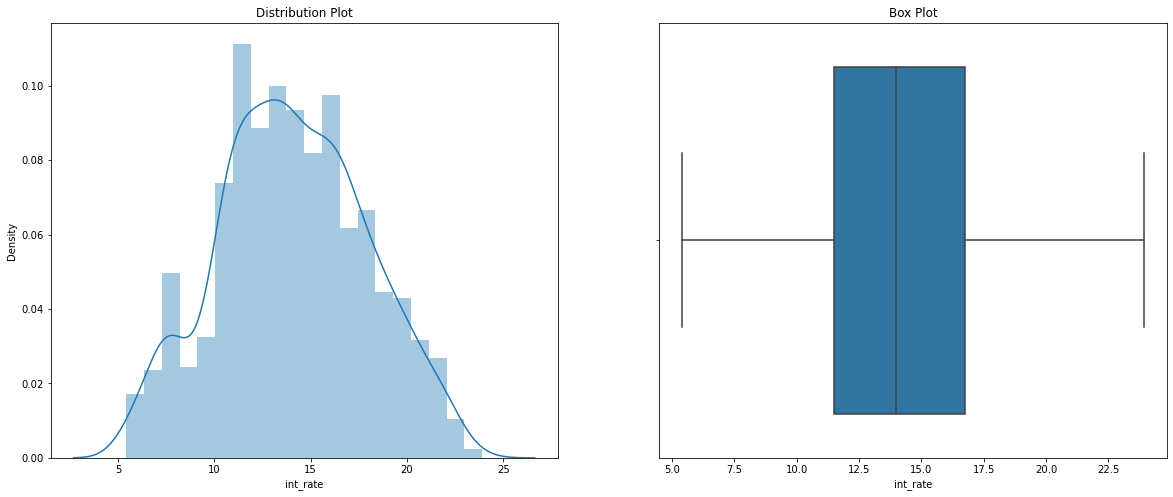

In [31]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(employee_length['int_rate'],ax = ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = employee_length, x = 'int_rate', ax = ax[1], orient = 'v')

plt.show()

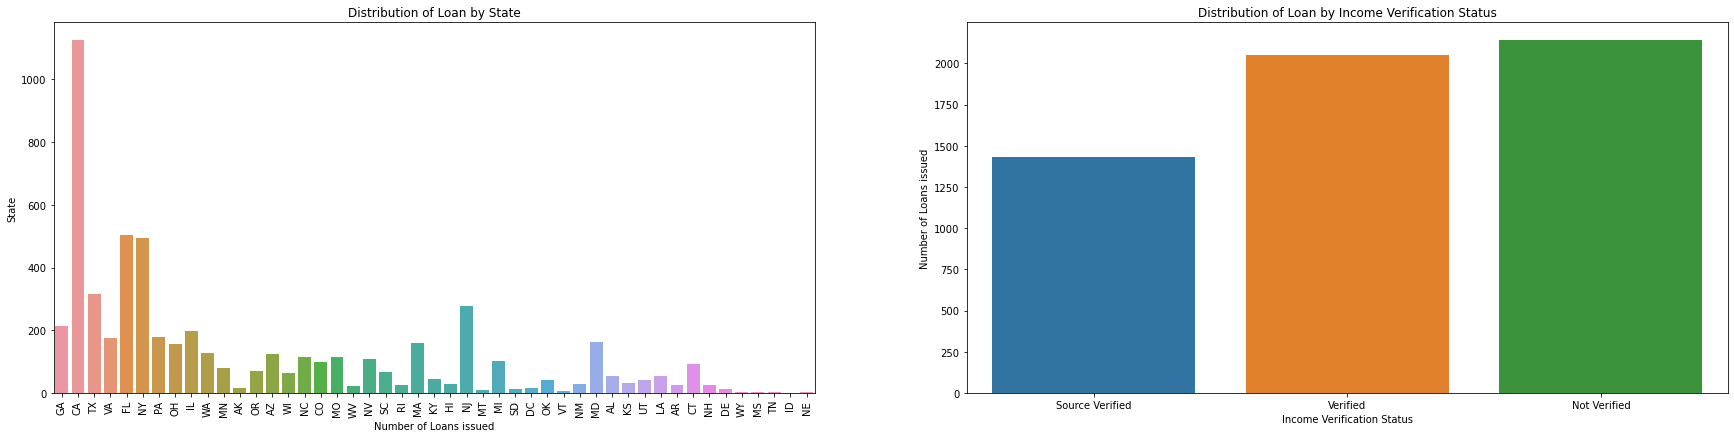

In [32]:
plt.figure(figsize=(30,15))

plt.figure(1)

plt.subplot(2,2,1)

# Distribution of Loan by State
sns.countplot(x='addr_state', data = charge_off)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")

# Distribution of Loan by Income Verification Status
plt.subplot(2,2,2)
sns.countplot(x='verification_status', data = charge_off)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")


plt.show()

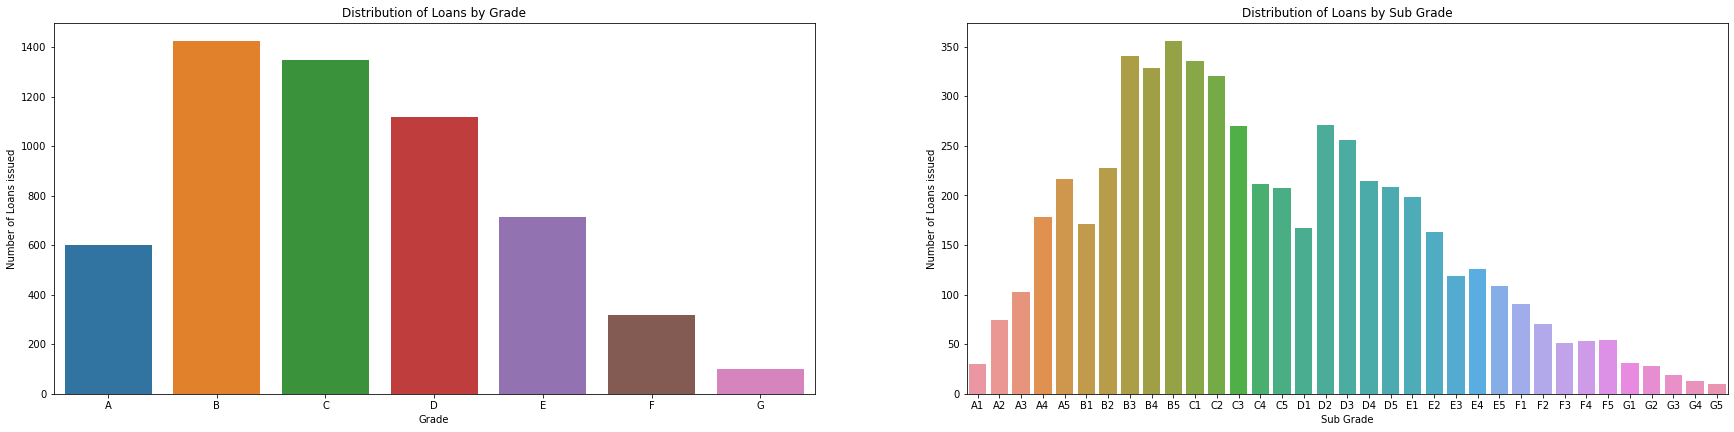

In [33]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(30,15))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=charge_off,order = np.sort(charge_off['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=charge_off, order = np.sort(charge_off['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

plt.show()

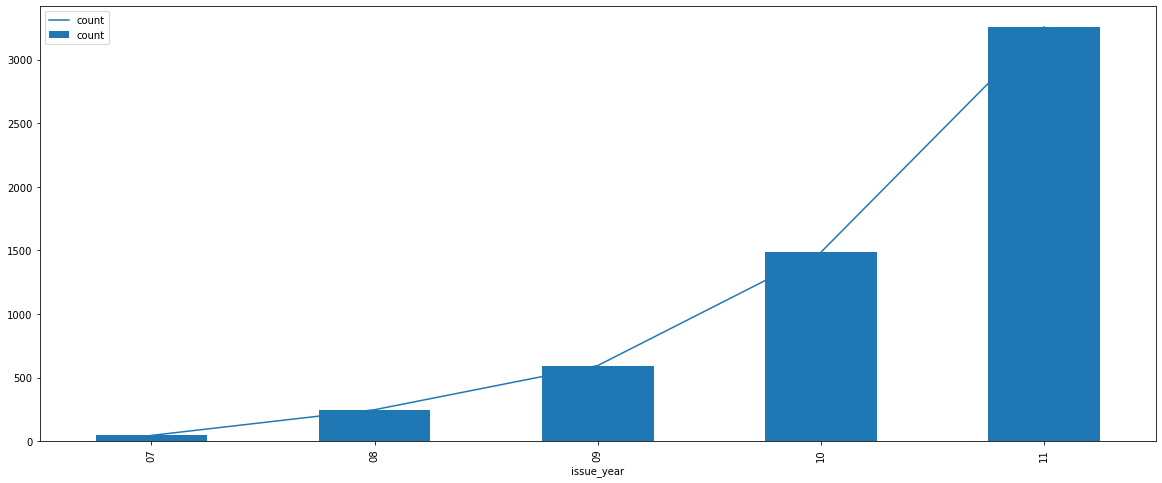

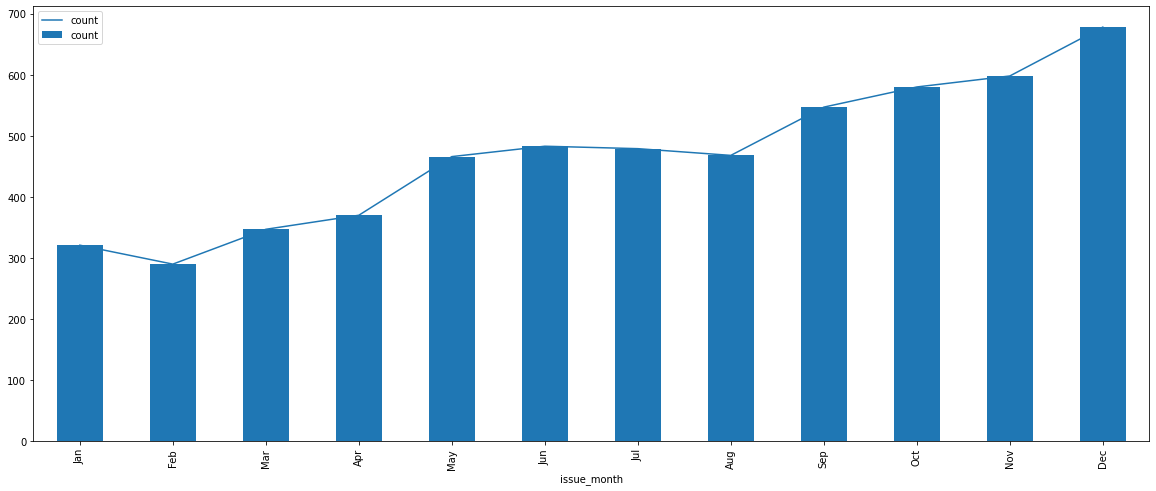

In [34]:
year_wise =charge_off.groupby(by= [charge_off.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

year_wise =charge_off.groupby(by= [charge_off.issue_month])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

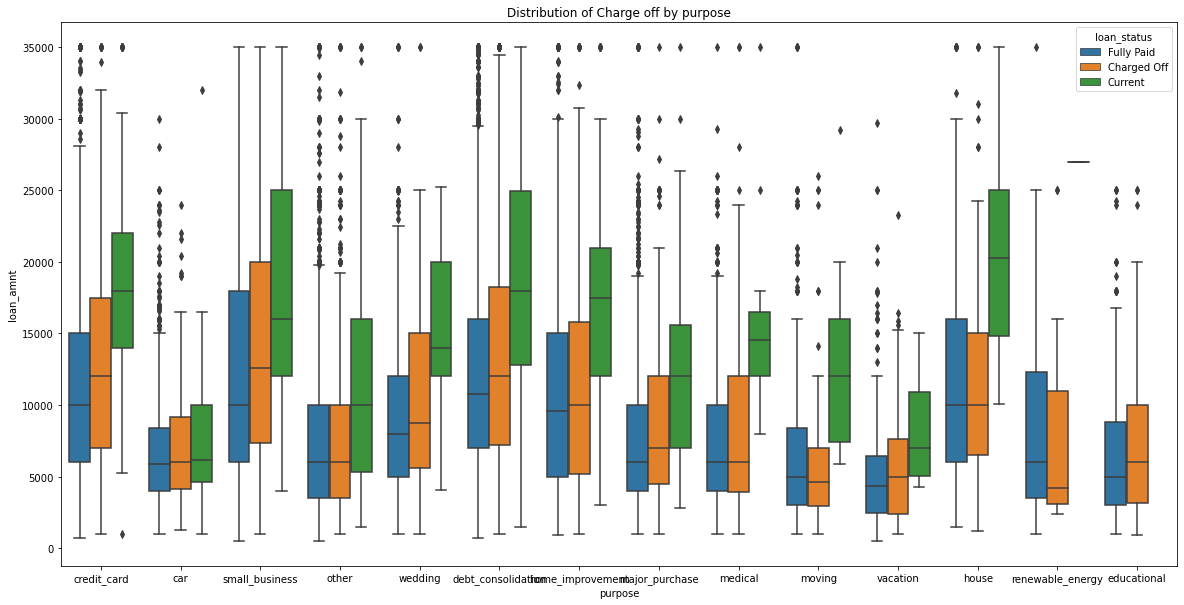

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Distribution of Charge off by purpose')
plt.show()

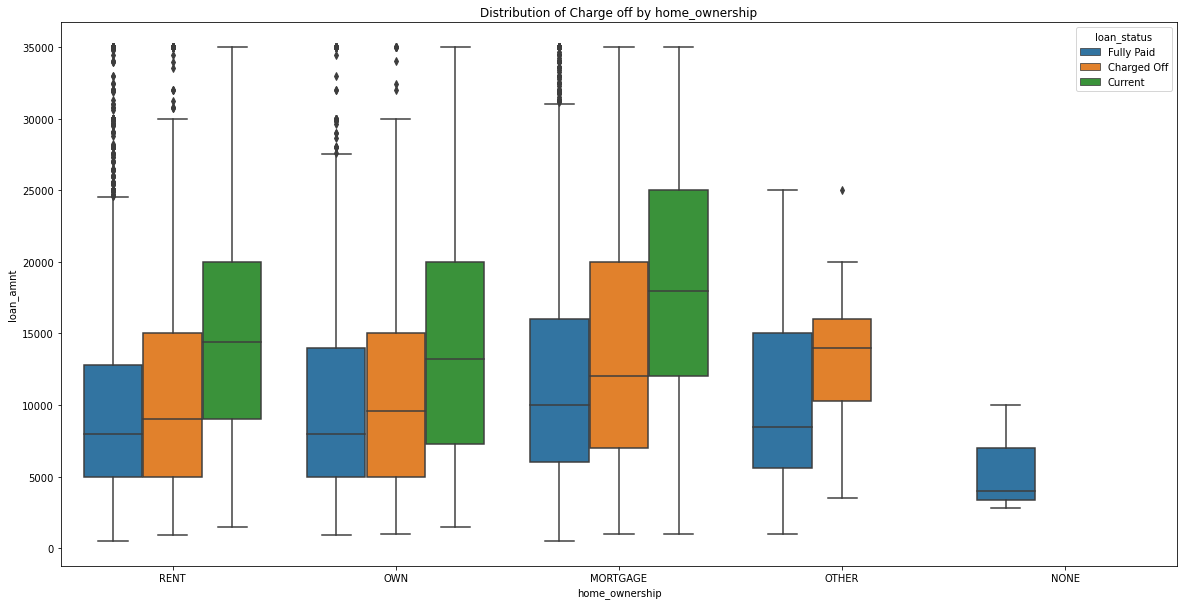

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data =df, x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.title('Distribution of Charge off by home_ownership')
plt.show()

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


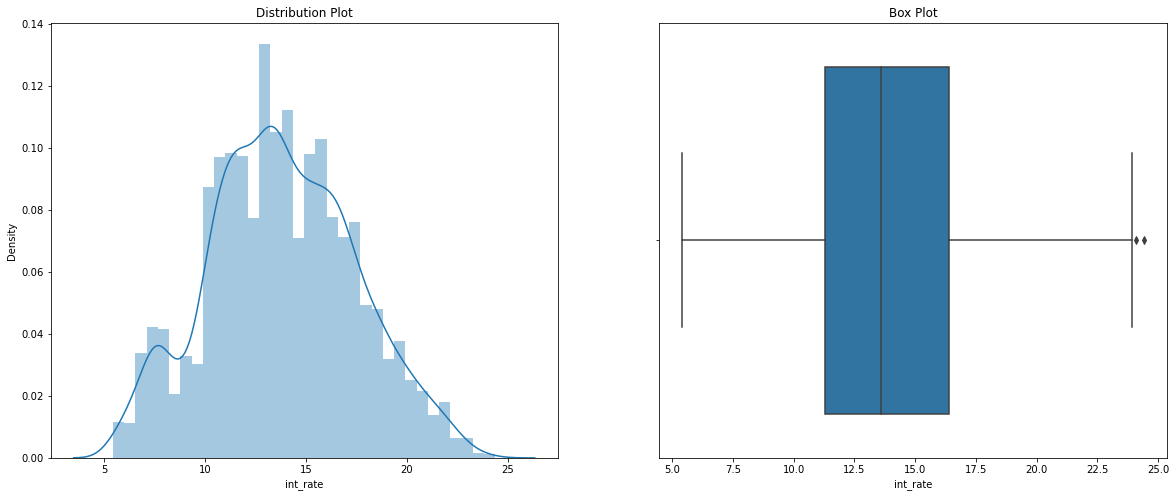

In [37]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(charge_off['int_rate'],ax = ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = charge_off, x = 'int_rate', ax = ax[1], orient = 'v')

plt.show()